<a href="https://colab.research.google.com/github/mpfoster/Biochem6765/blob/master/6765_asg2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biochem 6765 Assignment 2 Notebook

In [0]:
# load required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="ticks")

In [0]:
# Load Anscombe's dataset:
df = pd.read_csv('https://github.com/mpfoster/Biochem6765/raw/master/data/a-data.csv')
# could also load directly from seaborn package
# df=sns.load_dataset("anscombe")
# df.head() # print out a snapshot of the data:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [0]:
# let's define a new data frame with a subset of the data: 
df1=df.query("dataset == 'I'")    # all entries with "dataset == 'I'" will be placed in the new df1
#df1.head()
df1.describe()  # the command prints out basic statistics on the df
# can repeat the above for each of the 4 datasets

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [0]:
# or we can use the groupby command of dataframes
df.groupby(by='dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

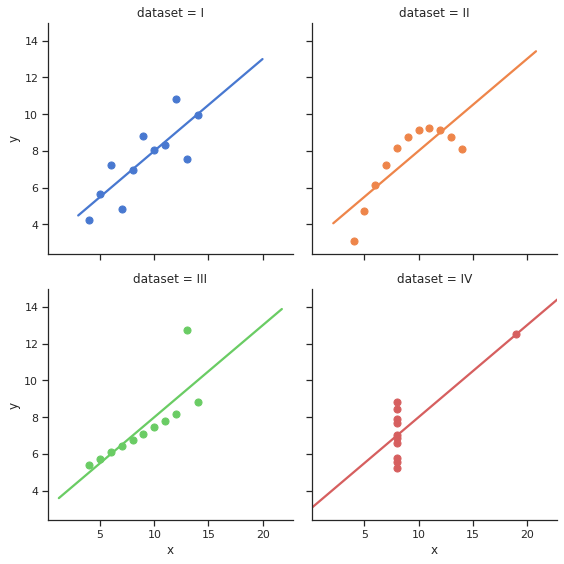

In [0]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
# sadly, while seaborn will compute and show the best-fit regression line, 
# seaborn doesn't reveal the regression parameters

In [0]:
# linear regression is easily performed with stats, without having to install other packages
stats.linregress(df1.x,df1.y)

In [0]:
# df.groupby(by="dataset").x
 x = df[df.dataset == 'I'].x
 y = df[df.dataset == 'I'].y
 stats.linregress(x,y)


LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)

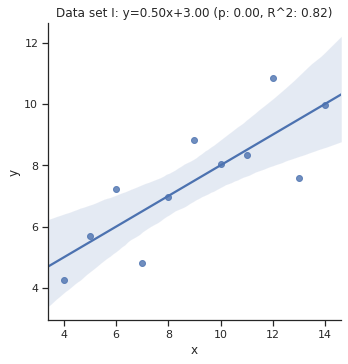

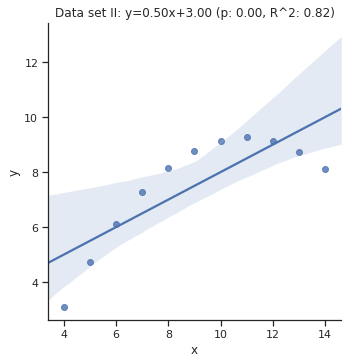

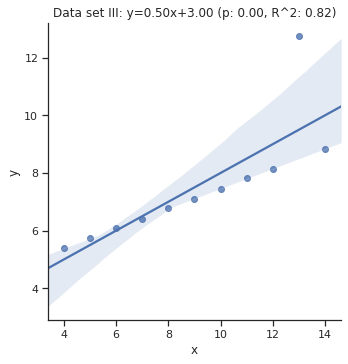

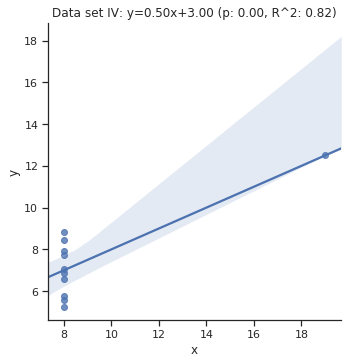

In [0]:
# or, we can get fancier and analyze all at once:
# from https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html
for data_set in df.dataset.unique():
  dfa = df.query("dataset == '{}'".format(data_set))
  slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x=dfa.x, y=dfa.y)
  sns.lmplot(x="x", y="y", data=dfa);
  plt.title("Data set {}: y={:.2f}x+{:.2f} (p: {:.2f}, R^2: {:.2f})".format(data_set, slope, intercept, p_val, r_val))

# Comments:
Obviously, these plots show that we cannot simply trust statistical metrics to determine whether data are well described by a given model. Each of the 4 datasets have nearly identical statistical metrics, and the same regression line and correlation coefficient. Despite this, visual inspection shows clearly that they are clearly all well described by a linear model.

# For fitting binding data using lmfit (6765 homework 2)


In [0]:
# load the required libraries
# import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pip install lmfit;
from lmfit import Model, Parameter, report_fit  # import the desired components

     |████████████████████████████████| 266kB 4.9MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 235kB 54.3MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.0-cp36-none-any.whl size=87915 sha256=58ad602458786d4a2d2168660d72fecd0a6e2825ef2ec139089b9a3b436a5311
  Stored in directory: /root/.cache/pip/wheels/1f/93/e9/8d3f759e466f5bbfed3ba1d7dc5b3d4389c469a1ec9a2acaee
  Created wheel for asteval: filename=asteval-0.9.18-cp36-none-any.whl size=17382 sha256=6710802e27147a98bca1cf38f9488216715282f690088d0ae5a2179eacb58e7d
  Stored in directory: /root/.cache/pip/wheels/1c/53/1b/28d929700c9633b1786a4982e6db564ec8326a8930234dcc19
  Created wheel for uncertainties: filename=uncertainties-3.1.2-cp36-none-any.whl size=96458 sha256=310ba2da712ed4db1cacfa8f8a53a2de10d23abbcb4dee025ccb3e7580c578ef
  Stored in directory: /root/.cache/pip/wheels/d9/d3/0e/5b0b743a8abd50373705427438456da5dc2621891138d7a618
Successfully built lmfit asteval uncertainties

Let's load some data:

In [0]:
# load some data from the web, at
#df = pd.read_table("https://www.asc.ohio-state.edu/foster.281/gnuplot/gnuplot_tutorial1_files/example1.txt",sep='\s+', header=None, comment='#')
#df.iloc[:,0]
df = pd.read_csv("https://github.com/mpfoster/Biochem6765/raw/master/data/data2.csv", comment='#')
df.head()

,Lt,Y
0,1.600000e-09,0.001
1,3.200000e-09,0.003
2,6.400000e-09,0.006
3,1.280000e-08,0.012
4,2.560000e-08,0.023


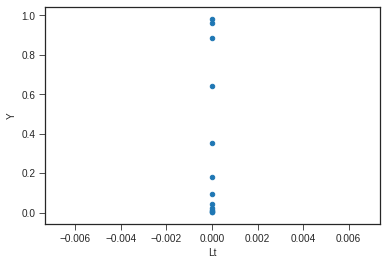

In [0]:
df.plot(x='Lt', y='Y', kind='scatter')
plt.style.use('seaborn-ticks')

The small range of x values doesn't play well with the automated range selection in matplotlib. We can rescale the x values by converting from the molar to the nano-molar scale; we mutlitply the values in the Lt column by 1e9:

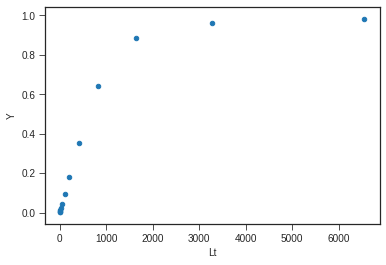

In [0]:
df.Lt = df.Lt.multiply(1e9) # change units to nanomolar (1e-9 M)
df.plot(x='Lt', y='Y', kind='scatter')

## Hyperbolic binding isotherm
As a first step, we define a function for fitting to the hyperbolic form of the binding isotherm
$$Y=\frac{[L]}{[L]+K_D}$$
and fit the data with this model, for which the only fitted parameter is _Kd_. (NB. if the _y_-axis were signal, we'd need a scaling factor and baseline value)

In [0]:
def hyperbolic(x, Kd):
    return x/(x+Kd)
model = Model(hyperbolic, independent_vars=['x'])   # define the model and parameters
result = model.fit(df.Y, x=df.Lt, Kd=1)   # perform the fit
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Kd     541.9     -inf      inf    73.99     True     None     None


(<Figure size 460.8x460.8 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

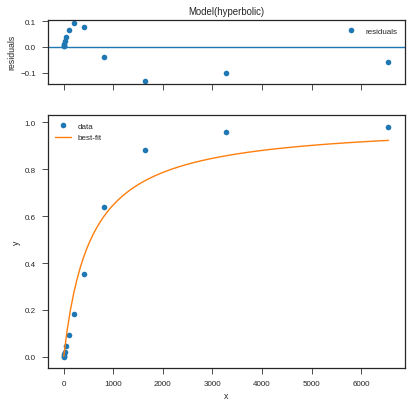

In [0]:
result.plot(numpoints=100)

For data2, it should be evident that the data is not well fit by the hyperbolic equation. 

## The Hill equation
Frequently, the Hill equation is used to fit binding data with no more justification than becuase it provides a better fit to the data. 
## Define a function for fitting to the hyperbolic form of the binding isotherm
$$Y=\frac{[L]^n}{[L]^n+K_D^n}$$ 

In [0]:
def hill(x, Kd, n):
    return x**n/(x**n+Kd**n)
model = Model(hill, independent_vars=['x'])
Kd = 10; n = 1 # starting values
result = model.fit(df.Y, x=df.Lt, Kd=Kd, n=n)
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Kd     553.3     -inf      inf    17.18     True     None     None
n      1.606     -inf      inf  0.07076     True     None     None


(<Figure size 460.8x460.8 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

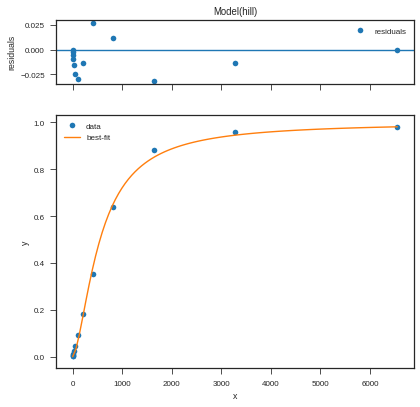

In [0]:
result.plot(numpoints=100)
#result.plot_fit()
#result.plot_residuals()

It is no surprise that the fit is better, since there are more parameters, but that doesn't necessarily mean the Hill equation is appropriate.

## The quadratic mass balance equation
This form of the binding isotherm has the advantage that it is valid whenever we know the total concentraitons of the interacting species. (It can also explicitly include a stoichiometry parameter)

In [0]:
# The quadratic equation could be applied with two fitted parameters; 
# usually, though Mt is known.
#def quadratic(x, Mt, Kd):
# return ((Kd+x+Mt)-((Kd+x+Mt)**2-4*x*Mt)**0.5)/(2*Mt)
# 
#model = Model(quadratic, independent_vars=['x','Mt'])
#result = model.fit(df.Y, x=df.Lt, Mt=Mt, Kd=1)  # starting param; Mt = 1e3 nM, i.e., 1e-6M


def quadratic(x, Kd):  # Here Mt will be defined globally -- not optimized
  return ((Kd+x+Mt)-((Kd+x+Mt)**2-4*x*Mt)**0.5)/(2*Mt)
  
Mt = 1e3  # that's 1000 nM, if rescaled from molar
model = Model(quadratic, independent_vars=['x'])
result = model.fit(df.Y, x=df.Lt, Kd=1)  # starting param; Mt = 1e3 nM, i.e., 1e-6M

v = result.params.valuesdict()  # fitted variables
Kd = v['Kd']
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Kd       100     -inf      inf   0.2262     True     None     None


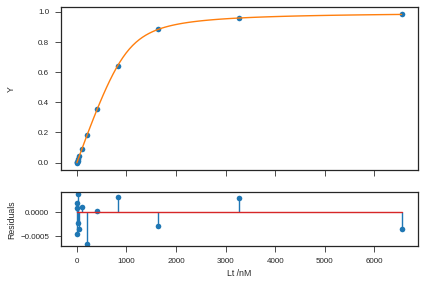

In [0]:
#plt.style.available
plt.style.use('seaborn-ticks')
maxLt = df.Lt.max()
import numpy as np
simx = np.linspace(0,maxLt,100)

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw = {'height_ratios':[3, 1]})
ax[0].plot(df.Lt,df.Y, 'o')
ax[0].plot(simx,quadratic(simx,Kd),'-')
ax[0].set_ylabel('Y')
ax[1].stem(df.Lt,df.Y-quadratic(df.Lt,Kd),use_line_collection=True)
ax[1].set_xlabel('Lt /nM')
ax[1].set_ylabel('Residuals')
fig.align_ylabels(ax[:,])
